In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd

companies  = pd.read_csv("./companies.csv", encoding='iso-8859-1')
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
rounds2 = pd.read_csv("./rounds2.csv", encoding='iso-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [2]:
companies.head(100)
companies['permalink'] = companies['permalink'].astype('str').str.upper()

In [3]:
len(companies.permalink.unique())

66368

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2['company_permalink'] = rounds2['company_permalink'].astype('str').str.upper()

In [6]:
len(rounds2.company_permalink.unique())

66368

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
#rounds2.merge(companies, how='inner', left_on='company_permalink', right_on='permalink')
rounds2.shape

(114949, 6)

In [10]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.shape

(114949, 16)

In [11]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
rounds2.company_permalink.isin(companies['permalink']).value_counts()

True    114949
Name: company_permalink, dtype: int64

In [13]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [14]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [15]:
master_frame.drop(columns=['permalink','funding_round_code'], axis=1, inplace=True)

In [16]:
master_frame.shape

(114949, 14)

In [17]:
master_frame.status.value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

In [18]:
# getting rid of entries for companies having status as closed. No point of having those in the analysis
master_frame = master_frame[(master_frame.status != 'closed')]
master_frame.shape

(106224, 14)

In [19]:
# As we are not requiring some of the columns for our analysis we can safely drop them
master_frame.drop(columns=['founded_at', 'funding_round_permalink', 'homepage_url','state_code','region','city'], axis=1, inplace=True)
master_frame.shape

(106224, 8)

In [20]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     18321
name                      0
category_list          2385
status                    0
country_code           6831
dtype: int64

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
funded_at              0.00
raised_amount_usd     17.25
name                   0.00
category_list          2.25
status                 0.00
country_code           6.43
dtype: float64

In [22]:
# Here we want to get rid of the entries which do not have country code. We cannnot involve those entries 
# in our analysis and need to removed now itself before we do country analysis as they should not contribute in our calcution
# of our central tendendancy of any variable. Hence removing as part of data cleaning.
master_frame = master_frame[(~master_frame.country_code.isnull())]
master_frame.shape

(99393, 8)

In [23]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     16116
name                      0
category_list          1413
status                    0
country_code              0
dtype: int64

In [24]:
master_frame.reset_index(inplace = True, drop=True)
master_frame.tail()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
99388,/ORGANIZATION/ZZZZAPP-COM,seed,01-11-2011,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99389,/ORGANIZATION/ZZZZAPP-COM,seed,01-08-2013,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99390,/ORGANIZATION/ZZZZAPP-COM,convertible_note,01-03-2014,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99391,/ORGANIZATION/ZZZZAPP-COM,seed,01-05-2013,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99392,/ORGANIZATION/ASYS-2,seed,01-01-2015,18192.0,Ãasys,Consumer Electronics|Internet of Things|Teleco...,operating,USA


#### Now we see around 17% missing values of raised_amount_usd column. Analysis for imputing these values

In [25]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
master_by_fund_type = master_frame.groupby(['funding_round_type'])

In [27]:
master_frame[(master_frame.raised_amount_usd.isnull())].head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,NaN,004 Technologies,Software,operating,USA
13,/ORGANIZATION/1,undisclosed,05-02-2013,NaN,One Inc.,Mobile,operating,USA
16,/ORGANIZATION/1-4-ALL,equity_crowdfunding,21-04-2013,NaN,1-4 All,Entertainment|Games|Software,operating,USA
17,/ORGANIZATION/1-618-TECHNOLOGY,equity_crowdfunding,22-01-2014,NaN,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA


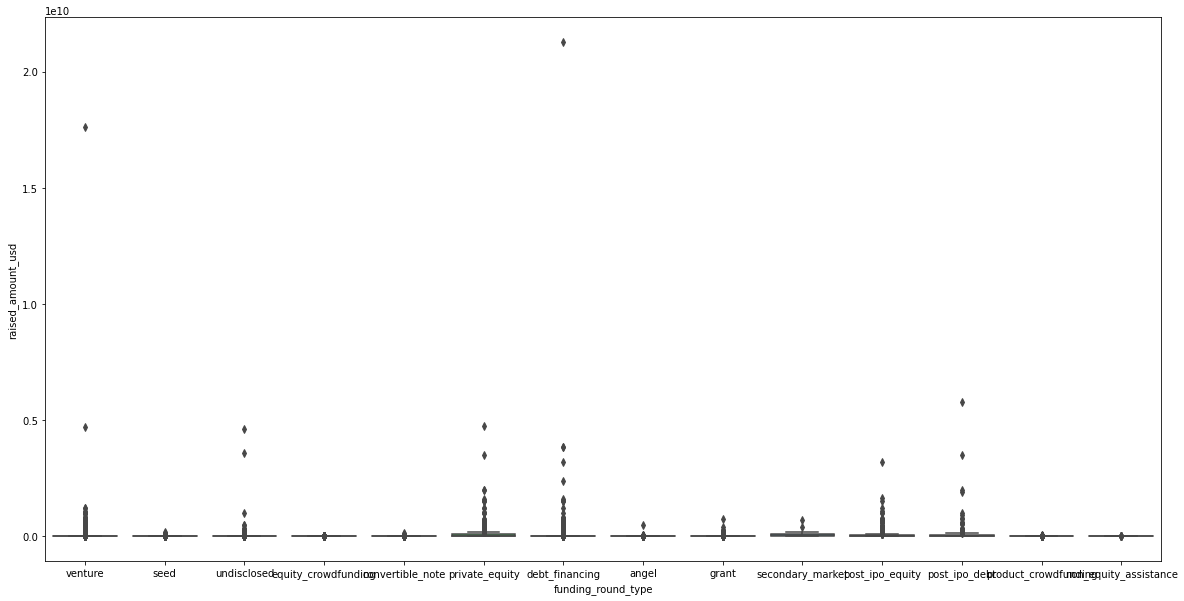

In [28]:
plt.figure(figsize=[20,10])
sns.boxplot(master_frame['funding_round_type'], master_frame.raised_amount_usd)
plt.show()

From the box plots for different funding type it can be seen that there are many outliers, due to which for imputing the 
missing raised_amount_usd we cannot use the mean value as it may deviate the analysis. Hence we have to consider median values for imputing.

In [29]:
# median value of raised_amount_usd which is around 1 million
master_frame.raised_amount_usd.median()

1842555.0

In [30]:
master_by_fund_type.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,3982.0,9.947552e+05,8.097381e+06,0.0,157504.00,415000.0,1.000000e+06,4.945120e+08
convertible_note,1275.0,1.340013e+06,6.085538e+06,0.0,82013.00,300000.0,1.000000e+06,1.500000e+08
debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10
equity_crowdfunding,1126.0,5.112600e+05,1.756837e+06,0.0,5000.00,80074.0,3.383222e+05,2.740000e+07
grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08
non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09
post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09
private_equity,1731.0,7.579720e+07,2.061303e+08,0.0,5400000.00,21000000.0,7.699983e+07,4.745460e+09


In [31]:
master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum()

funding_round_type
angel                     937
convertible_note          314
debt_financing            198
equity_crowdfunding      1975
grant                      60
non_equity_assistance      80
post_ipo_debt               0
post_ipo_equity             9
private_equity            260
product_crowdfunding       21
secondary_market           60
seed                     5166
undisclosed              2791
venture                  4245
Name: raised_amount_usd, dtype: int64

The above two cells show the median values with respect to the different funding_type. Medians are varying depending on the funding type. Imputing column median in all the missing cells of irrespective of funding_type will not be useful mainly for funding_types like seed, non_equity_assistance (which have lower range of fund raised). Also in the above cells we see the count of missing values is substantial for funding_types like seed and venture. So imputing these missing values with less accurate values might make it unrealistic. Instead we can impute the missing values with its category median, which will be more realistic and will not give wrong results.

In [32]:
master_frame.raised_amount_usd = master_frame.groupby(['funding_round_type']).raised_amount_usd.transform(lambda x: x.fillna(x.median()))

In [33]:
master_frame.isnull().sum()

company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd        0
name                     0
category_list         1413
status                   0
country_code             0
dtype: int64

In [34]:
master_frame.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-QOUNTER,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/0-6-COM,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA


In [35]:
master_frame.groupby(['funding_round_type']).raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4919.0,8.843200e+05,7.288840e+06,0.0,200000.00,415000.0,775000.00,4.945120e+08
convertible_note,1589.0,1.134498e+06,5.466496e+06,0.0,104501.00,300000.0,750000.00,1.500000e+08
debt_financing,6324.0,1.736530e+07,2.879926e+08,0.0,362026.25,1100000.0,3716736.00,2.127194e+10
equity_crowdfunding,3101.0,2.366414e+05,1.078472e+06,0.0,80074.00,80074.0,80074.00,2.740000e+07
grant,1922.0,4.160181e+06,2.473779e+07,0.0,65164.75,250000.0,1777687.75,7.500000e+08
non_equity_assistance,139.0,2.300342e+05,1.285772e+06,0.0,60000.00,60000.0,60000.00,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,60000000.00,5.800000e+09
post_ipo_equity,556.0,6.620181e+07,2.120381e+08,77.0,3871566.00,12000000.0,38130307.75,3.200000e+09
private_equity,1991.0,6.864136e+07,1.930786e+08,0.0,6700000.00,21000000.0,66000000.00,4.745460e+09


In [36]:
master_frame.country_code.value_counts()

USA    67609
GBR     5595
CAN     2893
CHN     2613
IND     2148
       ...  
IRN        1
DMA        1
PRY        1
BRB        1
BRN        1
Name: country_code, Length: 134, dtype: int64

In [37]:
master_frame_venture = master_frame[(master_frame.funding_round_type == 'venture')]

In [38]:
master_frame_venture.shape

(49194, 8)

In [39]:
master_frame_venture.funding_round_type.value_counts()

venture    49194
Name: funding_round_type, dtype: int64

In [40]:
master_frame_venture.dtypes

company_permalink      object
funding_round_type     object
funded_at              object
raised_amount_usd     float64
name                   object
category_list          object
status                 object
country_code           object
dtype: object

In [41]:
master_frame_venture.country_code.value_counts()

USA    35829
GBR     2133
CHN     2034
CAN     1239
IND      961
       ...  
MOZ        1
TUN        1
PSE        1
SEN        1
LAO        1
Name: country_code, Length: 102, dtype: int64

In [42]:
english_spk_countries = pd.read_csv("./EnglishSpCntrs.csv") 
english_spk_countries.head()

,EngSpeaking
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [43]:
master_frame_venture['IsEngSpeaking'] = master_frame_venture['country_code'].apply(
    lambda x: np.isin(x,english_spk_countries.EngSpeaking))

In [44]:
master_frame_venture.shape

(49194, 9)

In [45]:
master_frame_venture.sample(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking
41832,/ORGANIZATION/INSIDETRACK,venture,01-11-2005,2000000.0,InsideTrack,Education,operating,USA,True
62794,/ORGANIZATION/PACIFIC-AG,venture,06-07-2015,7000000.0,Pacific Ag,Renewable Energies,operating,USA,True
59951,/ORGANIZATION/NUTECH-MEDICAL,venture,01-02-2011,325000.0,Nutech Medical,Biotechnology,operating,USA,True
90972,/ORGANIZATION/URX,venture,28-04-2014,12000000.0,URX,Digital Media|Mobile|Mobile Commerce,operating,USA,True
89188,/ORGANIZATION/TRUEDEMAND-SOFTWARE,venture,02-08-2005,6000000.0,TrueDemand Software,Software,acquired,USA,True
81786,/ORGANIZATION/STANTUM,venture,18-03-2014,626467.0,Stantum,Hardware + Software,operating,FRA,False
80905,/ORGANIZATION/SPICEWORKS,venture,28-04-2011,25000000.0,Spiceworks,IT Management|Professional Networking|Social M...,operating,USA,True
27242,/ORGANIZATION/EMBRANE,venture,25-03-2014,14000000.0,Embrane,Software,acquired,USA,True
13294,/ORGANIZATION/BRIGHTWHISTLE,venture,10-08-2012,2100000.0,BrightWhistle,Advertising,acquired,USA,True
16434,/ORGANIZATION/CHAMATE,venture,15-12-2006,7500000.0,Chamate,Health and Wellness,operating,TWN,False


In [46]:
master_frame_venture_EngSpeaking = master_frame_venture[(master_frame_venture.IsEngSpeaking == True)]

In [47]:
master_frame_venture_EngSpeaking.shape

(41059, 9)

In [48]:
topEngSpCountries = master_frame_venture_EngSpeaking.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending = False)
topEngSpCountries.head(9)

country_code
USA    4.103551e+11
GBR    1.938634e+10
IND    1.487060e+10
CAN    9.255487e+09
SGP    3.059136e+09
IRL    1.900739e+09
AUS    1.327745e+09
NZL    4.288804e+08
ZAF    2.982131e+08
Name: raised_amount_usd, dtype: float64

In [49]:
top9 = pd.DataFrame(topEngSpCountries.head(9))

In [50]:
top9.head(10)

,raised_amount_usd
country_code,
USA,4.103551e+11
GBR,1.938634e+10
IND,1.487060e+10
CAN,9.255487e+09
SGP,3.059136e+09
IRL,1.900739e+09
AUS,1.327745e+09
NZL,4.288804e+08
ZAF,2.982131e+08


In [51]:
master_frame_venture_EngSpeaking.category_list = master_frame_venture_EngSpeaking.category_list.astype('str')

In [52]:
master_frame_venture_EngSpeaking['Primary_category'] = master_frame_venture_EngSpeaking['category_list'].apply(
    lambda x : x.split('|', maxsplit=1)[0])

In [53]:
master_frame_venture_EngSpeaking.sample(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category
42312,/ORGANIZATION/INTELLICYT,venture,22-10-2015,7400000.0,Intellicyt,Biotechnology,operating,USA,True,Biotechnology
47064,/ORGANIZATION/LABSTYLE-INNOVATIONS,venture,07-08-2015,789550.0,LabStyle Innovations,Hardware + Software,ipo,USA,True,Hardware + Software
68447,/ORGANIZATION/PROTEOSTASIS-THERAPEUTICS,venture,08-09-2015,37000000.0,Proteostasis Therapeutics,Biotechnology,operating,USA,True,Biotechnology
75888,/ORGANIZATION/SENSAGE,venture,11-04-2007,5000000.0,SenSage,Security,acquired,GBR,True,Security
22339,/ORGANIZATION/CYMBET,venture,01-01-2001,4500000.0,Cymbet,Batteries|Hardware + Software|Semiconductors,operating,USA,True,Batteries
33241,/ORGANIZATION/FUTUREDIAL,venture,26-01-2015,1334560.0,FutureDial,Mobile Commerce|Software|Wireless,operating,USA,True,Mobile Commerce
33121,/ORGANIZATION/FUNGOPLAY,venture,19-05-2011,1090000.0,FunGoPlay,Games,operating,USA,True,Games
87295,/ORGANIZATION/TIMETRADE,venture,24-09-2007,5000000.0,TimeTrade,Apps|Online Scheduling|Shopping,operating,USA,True,Apps
1298,/ORGANIZATION/ACCESS-CLOSURE,venture,01-10-2012,998100.0,Access Closure,Health Care,acquired,USA,True,Health Care
60009,/ORGANIZATION/NUVOTRONICS,venture,15-06-2009,200000.0,Nuvotronics,Hardware + Software,operating,USA,True,Hardware + Software
